In [1]:
# Path to the problematic image
image_path = "20bn-jester-v1/22624/00010.jpg"

try:
    # Try opening the image
    img = Image.open(image_path)
    img.verify()  # Verify that the image is not corrupt

    # If verification succeeds, reopen the image for display
    img = Image.open(image_path).convert("RGB")

    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Turn off axes
    plt.title("Image Display")
    plt.show()

except Exception as e:
    # Handle any exceptions, including corrupted file issues
    print(f"Error: {e}")

Error: name 'Image' is not defined


In [2]:
import os
from tqdm import tqdm

def check_images_in_subfolders(root_dir):
    empty_files = []
    subfolders = [os.path.join(root_dir, subfolder) for subfolder in os.listdir(root_dir)]

    # Iterate through subfolders
    for subfolder in tqdm(subfolders, desc="Checking subfolders"):
        for file in os.listdir(subfolder):
            file_path = os.path.join(subfolder, file)
            if os.path.getsize(file_path) == 0:  # Check if the file is empty
                empty_files.append(file_path)

    # Print results
    if empty_files:
        print("\nEmpty files found:")
        for empty_file in empty_files:
            print(empty_file)
    else:
        print("\nNo empty files found.")

# Set the root directory to check
root_directory = "20bn-jester-v1"  # Replace with your folder path
check_images_in_subfolders(root_directory)


Checking subfolders: 100%|█████████████| 148092/148092 [06:44<00:00, 366.40it/s]


No empty files found.


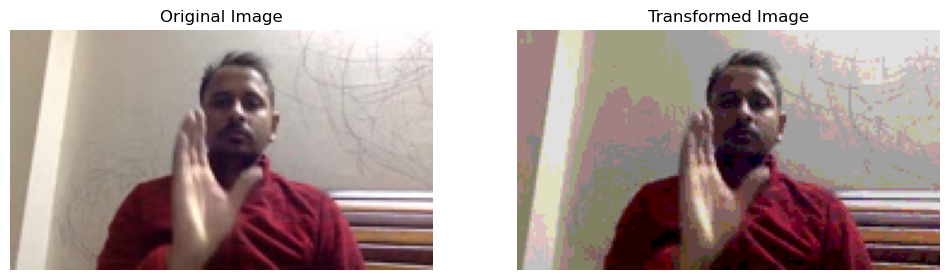

In [50]:
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_path = "20bn-jester-v1/22624/00010.jpg"
original_image = Image.open(image_path)

# Define the ElasticTransform with specific parameters
elastic_transform = transforms.ElasticTransform(alpha=50.0, sigma=8.0, fill=25)

# Apply the transformation
transformed_image = elastic_transform(original_image)

# Plot the original and transformed images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(original_image)
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(transformed_image)
axes[1].set_title("Transformed Image")
axes[1].axis("off")

plt.show()

In [ ]:
train_transform = transforms.Compose([
        transforms.Resize((size,size)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ColorJitter(
            brightness=0.1,
            contrast=0.1,
            saturation=0.1,
            hue=0.1
        ),
        transforms.Lambda(
            lambda img: transforms.functional.pad(
                img,
                padding=padding,
                padding_mode='reflect'
            )
        ),
        transforms.RandomRotation(15),
        transforms.CenterCrop((size, size)),
        transforms.RandomPosterize(bits=2),
        transforms.RandomAdjustSharpness(sharpness_factor=2),
        transforms.RandomAutocontrast(),
        transforms.RandomEqualize(),
        transforms.ToTensor(),
        transforms.Normalize(image_net_mean, image_net_std),
    ])

# Plot results

In [1]:
import os
import pickle
import matplotlib.pyplot as plt

# Path to the folder containing .pckl files
model_number = 2
DATA_FOLDER = f"metrics/model_{model_number}"

def plot_accuracies_losses(train_incl=False):
    """
    Plots a graph for accuracies and losses from .pckl files.

    Args:
        train_incl (bool): If True, the .pkl files contain tuples (train_value, eval_value).
                           If False, the .pkl files contain only eval_value.
    """
    # Load the data from .pckl files
    accuracies_path = os.path.join(DATA_FOLDER, "accuracies.pkl")
    losses_path = os.path.join(DATA_FOLDER, "losses.pkl")
    
    with open(accuracies_path, "rb") as f:
        accuracies = pickle.load(f)
    
    with open(losses_path, "rb") as f:
        losses = pickle.load(f)
    
    # Extract values based on train_incl
    if train_incl:
        train_accuracies = [acc[0] for acc in accuracies]
        eval_accuracies = [acc[1] for acc in accuracies]
        train_losses = [loss[0] for loss in losses]
        eval_losses = [loss[1] for loss in losses]
    else:
        eval_accuracies = accuracies
        eval_losses = losses
        train_accuracies = train_losses = None

    # Identify the minimum loss and maximum accuracy
    min_loss = min(eval_losses)
    min_loss_idx = eval_losses.index(min_loss)
    max_accuracy = max(eval_accuracies)
    max_accuracy_idx = eval_accuracies.index(max_accuracy)

    # Plot the data
    plt.figure(figsize=(10, 6))
    if train_incl:
        plt.plot(train_accuracies, label="Train Accuracy", linestyle="--", marker="o")
        plt.plot(train_losses, label="Train Loss", linestyle="--", marker="x")
    plt.plot(eval_accuracies, label="Eval Accuracy", marker="o")
    plt.plot(eval_losses, label="Eval Loss", marker="x")

    # Highlight min loss and max accuracy
    plt.scatter(min_loss_idx, min_loss, color="red", label=f"Min Loss: {min_loss:.4f}", zorder=5)
    plt.scatter(max_accuracy_idx, max_accuracy, color="green", label=f"Max Accuracy: {max_accuracy:.4f}", zorder=5)

    # Labels, legend, and title
    plt.xlabel("Epochs")
    plt.ylabel("Value")
    plt.title("Training and Evaluation Metrics")
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.tight_layout()
    plt.savefig(f"plots/model_{model_number}/epochs_plot.png")
    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/vol/home/s3705609/Desktop/ComputerVision_ass3/plots/model_2/epochs_plot.png'

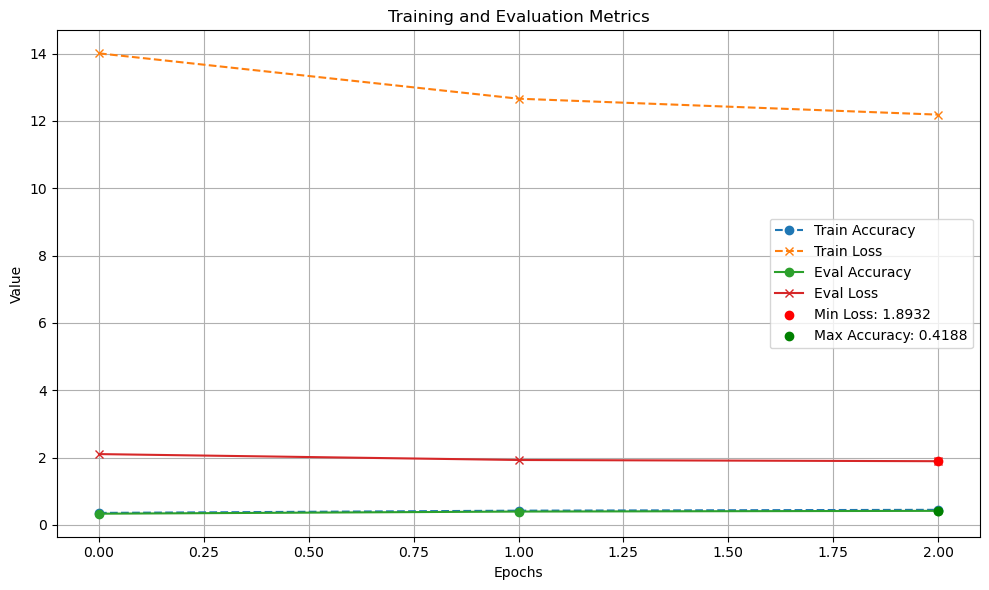

In [5]:
plot_accuracies_losses(True)

Plotly version

In [1]:
import os
import pickle
import plotly.graph_objects as go

# Path to the folder containing .pkl files
model_number = 6
DATA_FOLDER = f"metrics/model_{model_number}"

def plot_accuracies_losses_plotly(train_incl=False):
    """
    Plots a graph for accuracies and losses from .pkl files using Plotly.

    Args:
        train_incl (bool): If True, the .pkl files contain tuples (train_value, eval_value).
                           If False, the .pkl files contain only eval_value.
    """
    # Load the data from .pkl files
    accuracies_path = os.path.join(DATA_FOLDER, "accuracies.pkl")
    losses_path = os.path.join(DATA_FOLDER, "losses.pkl")
    
    with open(accuracies_path, "rb") as f:
        accuracies = pickle.load(f)
    
    with open(losses_path, "rb") as f:
        losses = pickle.load(f)
    
    # Extract values based on train_incl
    if train_incl:
        train_accuracies = [acc[0] for acc in accuracies]
        eval_accuracies = [acc[1] for acc in accuracies]
        train_losses = [loss[0] for loss in losses]
        eval_losses = [loss[1] for loss in losses]
    else:
        eval_accuracies = accuracies
        eval_losses = losses
        train_accuracies = train_losses = None

    # Identify the minimum loss and maximum accuracy
    min_loss = min(eval_losses)
    min_loss_idx = eval_losses.index(min_loss)
    max_accuracy = max(eval_accuracies)
    max_accuracy_idx = eval_accuracies.index(max_accuracy)

    # Create a Plotly figure
    fig = go.Figure()

    # Add traces for the data
    if train_incl:
        fig.add_trace(go.Scatter(
            y=train_accuracies,
            mode='lines+markers',
            name='Train Accuracy',
            line=dict(dash='dash'),
            marker=dict(symbol='circle')
        ))
        fig.add_trace(go.Scatter(
            y=train_losses,
            mode='lines+markers',
            name='Train Loss',
            line=dict(dash='dash'),
            marker=dict(symbol='x')
        ))
    fig.add_trace(go.Scatter(
        y=eval_accuracies,
        mode='lines+markers',
        name='Eval Accuracy',
        marker=dict(symbol='circle')
    ))
    fig.add_trace(go.Scatter(
        y=eval_losses,
        mode='lines+markers',
        name='Eval Loss',
        marker=dict(symbol='x')
    ))

    # Highlight min loss and max accuracy
    fig.add_trace(go.Scatter(
        x=[min_loss_idx],
        y=[min_loss],
        mode='markers+text',
        name='Min Loss',
        text=[f'Min Loss: {min_loss:.4f}'],
        textposition='bottom center',
        marker=dict(color='red', size=10)
    ))
    fig.add_trace(go.Scatter(
        x=[max_accuracy_idx],
        y=[max_accuracy],
        mode='markers+text',
        name='Max Accuracy',
        text=[f'Max Accuracy: {max_accuracy:.4f}'],
        textposition='top center',
        marker=dict(color='green', size=10)
    ))

    # Update layout for labels and title
    fig.update_layout(
        title=f"Training and Evaluation Metrics (Model {model_number})",
        xaxis_title="Epochs",
        yaxis_title="Value",
        legend=dict(x=0, y=1)
    )

    # Save the plot as an HTML file
    save_dir = f"plots/model_{model_number}"
    os.makedirs(save_dir, exist_ok=True)  # Ensure the directory exists
    html_path = os.path.join(save_dir, "epochs_plot.html")
    fig.write_html(html_path)
    print(f"Plot saved to {html_path}")

    # Show the interactive plot
    fig.show()

In [2]:
plot_accuracies_losses_plotly(train_incl=True)

FileNotFoundError: [Errno 2] No such file or directory: 'metrics/model_6/accuracies.pkl'